## marking coordinates

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


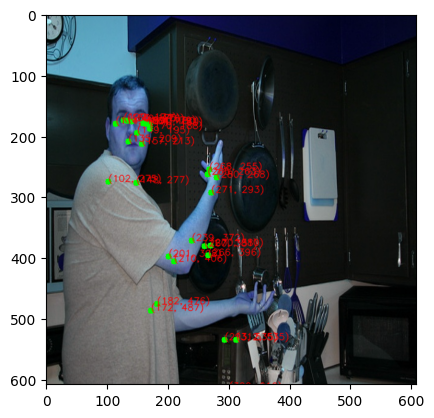

In [1]:
import cv2
import mediapipe as mp

# Load the pose estimation model
mp_pose = mp.solutions.pose

# Read and preprocess the image
image = cv2.imread('000000000294.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform pose estimation
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)
    landmarks = results.pose_landmarks

    # Extract body coordinates and display them
    if landmarks:
        for i, landmark in enumerate(landmarks.landmark):
            # Get the x, y coordinates of each body part
            height, width, _ = image.shape
            x = int(landmark.x * width)
            y = int(landmark.y * height)
            
            # Display the coordinates on the image
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Display the image with coordinates
import matplotlib.pyplot as plt

plt.imshow(image)
# cv2.imshow('Body Coordinates', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


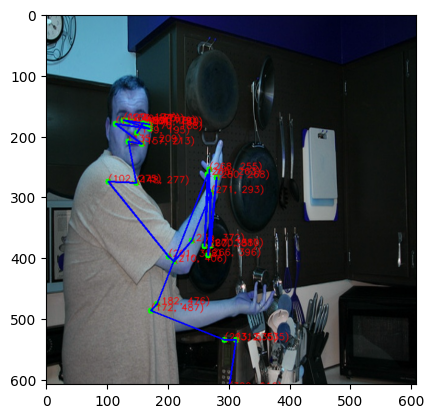

In [2]:
import cv2
import mediapipe as mp

# Load the pose estimation model
mp_pose = mp.solutions.pose

# Read and preprocess the image
image = cv2.imread('000000000294.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform pose estimation
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)
    landmarks = results.pose_landmarks

    # Extract body coordinates and display them
    if landmarks:
        # Create a list to store the coordinates
        coordinates = []

        for i, landmark in enumerate(landmarks.landmark):
            # Get the x, y coordinates of each body part
            height, width, _ = image.shape
            x = int(landmark.x * width)
            y = int(landmark.y * height)

            # Append the coordinates to the list
            coordinates.append((x, y))

            # Display the coordinates on the image
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # Join the coordinates with lines
        for i in range(len(coordinates) - 1):
            x_a, y_a = coordinates[i]
            x_b, y_b = coordinates[i + 1]

            # Draw a line between the two body parts
            cv2.line(image, (x_a, y_a), (x_b, y_b), (0, 0, 255), 2)

plt.imshow(image)           
        # Display the image with coordinates and lines
#         cv2.imshow('Body with Lines', image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()


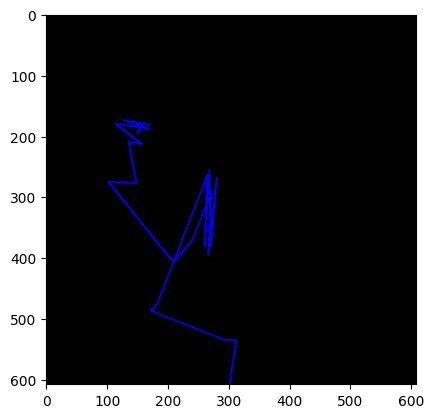

In [3]:
import cv2
import numpy as np
import mediapipe as mp

# Load the pose estimation model
mp_pose = mp.solutions.pose

# Read the input image
input_image = cv2.imread('000000000294.jpg')

# Create a black image with the same size as the input image
height, width, _ = input_image.shape
output_image = np.zeros((height, width, 3), dtype=np.uint8)

# Perform pose estimation
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    landmarks = results.pose_landmarks

    # Extract body coordinates and display them
    if landmarks:
        # Create a list to store the coordinates
        coordinates = []

        for i, landmark in enumerate(landmarks.landmark):
            # Get the x, y coordinates of each body part
            x = int(landmark.x * width)
            y = int(landmark.y * height)

            # Append the coordinates to the list
            coordinates.append((x, y))

            # Display the coordinates on the input image
            cv2.circle(input_image, (x, y), 5, (0, 255, 0), -1)
            cv2.putText(input_image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # Join the coordinates with lines on the output image
        for i in range(len(coordinates) - 1):
            x_a, y_a = coordinates[i]
            x_b, y_b = coordinates[i + 1]

            # Draw a line between the two body parts on the output image
            cv2.line(output_image, (x_a, y_a), (x_b, y_b), (0, 0, 255), 2)

#         # Display the input image with coordinates
#         cv2.imshow('Input Image with Coordinates', input_image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

#         # Display the output image with lines
#         cv2.imshow('Output Image with Lines', output_image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
plt.imshow(output_image)

In [4]:
import os 

In [5]:
imgs = os.listdir('person_images')

In [6]:
Dir = './person_images'


mp_pose = mp.solutions.pose

for im in imgs:
    D = os.path.join(Dir,im)
    print(D)
    # Read and preprocess the image
    image = cv2.imread(D)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform pose estimation
    with mp_pose.Pose(static_image_mode=True) as pose:
        results = pose.process(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        landmarks = results.pose_landmarks

        # Extract body coordinates and display them
        if landmarks:
            # Create a list to store the coordinates
            coordinates = []

            for i, landmark in enumerate(landmarks.landmark):
                # Get the x, y coordinates of each body part
                x = int(landmark.x * width)
                y = int(landmark.y * height)

                # Append the coordinates to the list
                coordinates.append((x, y))

                # Display the coordinates on the input image
                cv2.circle(input_image, (x, y), 5, (0, 255, 0), -1)
                cv2.putText(input_image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

            # Join the coordinates with lines on the output image
            for i in range(len(coordinates) - 1):
                x_a, y_a = coordinates[i]
                x_b, y_b = coordinates[i + 1]

                # Draw a line between the two body parts on the output image
                cv2.line(output_image, (x_a, y_a), (x_b, y_b), (0, 0, 255), 2)

    save_path = os.path.join('coords/',im)     
    plt.imsave(save_path,output_image)


./person_images/000000020904.jpg
./person_images/000000003076.jpg
./person_images/000000041959.jpg
./person_images/000000023548.jpg
./person_images/000000011288.jpg
./person_images/000000023102.jpg
./person_images/000000018418.jpg
./person_images/000000019446.jpg
./person_images/000000037102.jpg
./person_images/000000010920.jpg
./person_images/000000022044.jpg
./person_images/000000021329.jpg
./person_images/000000013719.jpg
./person_images/000000043773.jpg
./person_images/000000040428.jpg
./person_images/000000020644.jpg
./person_images/000000010837.jpg
./person_images/000000039764.jpg
./person_images/000000009727.jpg
./person_images/000000022801.jpg
./person_images/000000020983.jpg
./person_images/000000042858.jpg
./person_images/000000035361.jpg
./person_images/000000006627.jpg
./person_images/000000023094.jpg
./person_images/000000011025.jpg
./person_images/000000031752.jpg
./person_images/000000027417.jpg
./person_images/000000020456.jpg
./person_images/000000015576.jpg
./person_i

./person_images/000000020444.jpg
./person_images/000000045840.jpg
./person_images/000000015554.jpg
./person_images/000000015117.jpg
./person_images/000000038449.jpg
./person_images/000000026506.jpg
./person_images/000000031948.jpg
./person_images/000000037905.jpg
./person_images/000000029587.jpg
./person_images/000000009929.jpg
./person_images/000000012666.jpg
./person_images/000000007320.jpg
./person_images/000000006562.jpg
./person_images/000000031434.jpg
./person_images/000000007069.jpg
./person_images/000000027412.jpg
./person_images/000000035795.jpg
./person_images/000000025758.jpg
./person_images/000000016715.jpg
./person_images/000000048388.jpg
./person_images/000000038714.jpg
./person_images/000000039185.jpg
./person_images/000000016125.jpg
./person_images/000000043657.jpg
./person_images/000000001315.jpg
./person_images/000000016056.jpg
./person_images/000000024869.jpg
./person_images/000000039754.jpg
./person_images/000000047735.jpg
./person_images/000000043692.jpg
./person_i

./person_images/000000004441.jpg
./person_images/000000006287.jpg
./person_images/000000012108.jpg
./person_images/000000032918.jpg
./person_images/000000027727.jpg
./person_images/000000005373.jpg
./person_images/000000040298.jpg
./person_images/000000018327.jpg
./person_images/000000025024.jpg
./person_images/000000003521.jpg
./person_images/000000020342.jpg
./person_images/000000022129.jpg
./person_images/000000016521.jpg
./person_images/000000007524.jpg
./person_images/000000005156.jpg
./person_images/000000039643.jpg
./person_images/000000021183.jpg
./person_images/000000047073.jpg
./person_images/000000037682.jpg
./person_images/000000032804.jpg
./person_images/000000037354.jpg
./person_images/000000048668.jpg
./person_images/000000018480.jpg
./person_images/000000022462.jpg
./person_images/000000044813.jpg
./person_images/000000018482.jpg
./person_images/000000039113.jpg
./person_images/000000015496.jpg
./person_images/000000008396.jpg
./person_images/000000033581.jpg
./person_i

./person_images/000000001451.jpg
./person_images/000000030888.jpg
./person_images/000000000572.jpg
./person_images/000000004665.jpg
./person_images/000000031981.jpg
./person_images/000000042225.jpg
./person_images/000000024971.jpg
./person_images/000000007228.jpg
./person_images/000000034691.jpg
./person_images/000000000897.jpg
./person_images/000000000969.jpg
./person_images/000000033835.jpg
./person_images/000000044494.jpg
./person_images/000000028356.jpg
./person_images/000000020119.jpg
./person_images/000000004180.jpg
./person_images/000000048047.jpg
./person_images/000000047260.jpg
./person_images/000000040948.jpg
./person_images/000000036816.jpg
./person_images/000000011258.jpg
./person_images/000000004574.jpg
./person_images/000000015451.jpg
./person_images/000000041859.jpg
./person_images/000000013783.jpg
./person_images/000000045687.jpg
./person_images/000000046818.jpg
./person_images/000000049069.jpg
./person_images/000000031358.jpg
./person_images/000000006780.jpg
./person_i

./person_images/000000019763.jpg
./person_images/000000020315.jpg
./person_images/000000045536.jpg
./person_images/000000025105.jpg
./person_images/000000027241.jpg
./person_images/000000025847.jpg
./person_images/000000016382.jpg
./person_images/000000013082.jpg
./person_images/000000032722.jpg
./person_images/000000040470.jpg
./person_images/000000002278.jpg
./person_images/000000013332.jpg
./person_images/000000039100.jpg
./person_images/000000036528.jpg
./person_images/000000041085.jpg
./person_images/000000034299.jpg
./person_images/000000048129.jpg
./person_images/000000041710.jpg
./person_images/000000018523.jpg
./person_images/000000008297.jpg
./person_images/000000018584.jpg
./person_images/000000022367.jpg
./person_images/000000028953.jpg
./person_images/000000036811.jpg
./person_images/000000034815.jpg
./person_images/000000014152.jpg
./person_images/000000001397.jpg
./person_images/000000015581.jpg
./person_images/000000005701.jpg
./person_images/000000042837.jpg
./person_i

./person_images/000000017935.jpg
./person_images/000000034445.jpg
./person_images/000000013092.jpg
./person_images/000000003637.jpg
./person_images/000000012153.jpg
./person_images/000000041920.jpg
./person_images/000000016101.jpg
./person_images/000000030731.jpg
./person_images/000000046737.jpg
./person_images/000000004993.jpg
./person_images/000000000974.jpg
./person_images/000000006824.jpg
./person_images/000000033991.jpg
./person_images/000000043232.jpg
./person_images/000000039081.jpg
./person_images/000000018466.jpg
./person_images/000000014203.jpg
./person_images/000000027424.jpg
./person_images/000000005245.jpg
./person_images/000000004246.jpg
./person_images/000000032712.jpg
./person_images/000000045058.jpg
./person_images/000000028540.jpg
./person_images/000000041649.jpg
./person_images/000000049382.jpg
./person_images/000000035216.jpg
./person_images/000000000241.jpg
./person_images/000000007325.jpg
./person_images/000000029254.jpg
./person_images/000000008587.jpg
./person_i

./person_images/000000001958.jpg
./person_images/000000043191.jpg
./person_images/000000048558.jpg
./person_images/000000023450.jpg
./person_images/000000041658.jpg
./person_images/000000000077.jpg
./person_images/000000008981.jpg
./person_images/000000012529.jpg
./person_images/000000014757.jpg
./person_images/000000049092.jpg
./person_images/000000049283.jpg
./person_images/000000048130.jpg
./person_images/000000046990.jpg
./person_images/000000038747.jpg
./person_images/000000023982.jpg
./person_images/000000011713.jpg
./person_images/000000026529.jpg
./person_images/000000049662.jpg
./person_images/000000029275.jpg
./person_images/000000002686.jpg
./person_images/000000040995.jpg
./person_images/000000024239.jpg
./person_images/000000026780.jpg
./person_images/000000044437.jpg
./person_images/000000040219.jpg
./person_images/000000003535.jpg
./person_images/000000025621.jpg
./person_images/000000006675.jpg
./person_images/000000016706.jpg
./person_images/000000004554.jpg
./person_i

./person_images/000000030049.jpg
./person_images/000000037955.jpg
./person_images/000000044700.jpg
./person_images/000000005032.jpg
./person_images/000000004772.jpg
./person_images/000000012192.jpg
./person_images/000000048670.jpg
./person_images/000000001563.jpg
./person_images/000000047249.jpg
./person_images/000000009993.jpg
./person_images/000000024454.jpg
./person_images/000000019489.jpg
./person_images/000000037646.jpg
./person_images/000000007838.jpg
./person_images/000000035580.jpg
./person_images/000000014056.jpg
./person_images/000000006031.jpg
./person_images/000000041574.jpg
./person_images/000000028072.jpg
./person_images/000000018501.jpg
./person_images/000000041549.jpg
./person_images/000000049346.jpg
./person_images/000000048165.jpg
./person_images/000000036614.jpg
./person_images/000000023025.jpg
./person_images/000000013172.jpg
./person_images/000000000544.jpg
./person_images/000000027667.jpg
./person_images/000000023603.jpg
./person_images/000000011774.jpg
./person_i

./person_images/000000044140.jpg
./person_images/000000042804.jpg
./person_images/000000002614.jpg
./person_images/000000041138.jpg
./person_images/000000036563.jpg
./person_images/000000019032.jpg
./person_images/000000017192.jpg
./person_images/000000002369.jpg
./person_images/000000044800.jpg
./person_images/000000014219.jpg
./person_images/000000024285.jpg
./person_images/000000020175.jpg
./person_images/000000001586.jpg
./person_images/000000042685.jpg
./person_images/000000002907.jpg
./person_images/000000031390.jpg
./person_images/000000006539.jpg
./person_images/000000036041.jpg
./person_images/000000023702.jpg
./person_images/000000026320.jpg
./person_images/000000027371.jpg
./person_images/000000011487.jpg
./person_images/000000026775.jpg
./person_images/000000017962.jpg
./person_images/000000028872.jpg
./person_images/000000016827.jpg
./person_images/000000019304.jpg
./person_images/000000015619.jpg
./person_images/000000042570.jpg
./person_images/000000035844.jpg
./person_i

./person_images/000000003118.jpg
./person_images/000000043077.jpg
./person_images/000000004972.jpg
./person_images/000000039261.jpg
./person_images/000000047720.jpg
./person_images/000000012096.jpg
./person_images/000000002525.jpg
./person_images/000000015067.jpg
./person_images/000000019320.jpg
./person_images/000000033742.jpg
./person_images/000000010244.jpg
./person_images/000000033631.jpg
./person_images/000000007594.jpg
./person_images/000000032544.jpg
./person_images/000000033808.jpg
./person_images/000000040839.jpg
./person_images/000000001298.jpg
./person_images/000000021204.jpg
./person_images/000000028335.jpg
./person_images/000000036149.jpg
./person_images/000000019129.jpg
./person_images/000000042349.jpg
./person_images/000000026132.jpg
./person_images/000000038693.jpg
./person_images/000000045554.jpg
./person_images/000000035004.jpg
./person_images/000000025870.jpg
./person_images/000000028174.jpg
./person_images/000000002567.jpg
./person_images/000000020410.jpg
./person_i

./person_images/000000049682.jpg
./person_images/000000034800.jpg
./person_images/000000001637.jpg
./person_images/000000017236.jpg
./person_images/000000038277.jpg
./person_images/000000019980.jpg
./person_images/000000004764.jpg
./person_images/000000013959.jpg
./person_images/000000034283.jpg
./person_images/000000032491.jpg
./person_images/000000023355.jpg
./person_images/000000001864.jpg
./person_images/000000033601.jpg
./person_images/000000027907.jpg
./person_images/000000039398.jpg
./person_images/000000029934.jpg
./person_images/000000023054.jpg
./person_images/000000004742.jpg
./person_images/000000002983.jpg
./person_images/000000005828.jpg
./person_images/000000042750.jpg
./person_images/000000018367.jpg
./person_images/000000014004.jpg
./person_images/000000029146.jpg
./person_images/000000002644.jpg
./person_images/000000010138.jpg
./person_images/000000042756.jpg
./person_images/000000014477.jpg
./person_images/000000035964.jpg
./person_images/000000029312.jpg
./person_i

./person_images/000000043029.jpg
./person_images/000000005278.jpg
./person_images/000000016897.jpg
./person_images/000000009171.jpg
./person_images/000000029391.jpg
./person_images/000000034222.jpg
./person_images/000000018783.jpg
./person_images/000000004716.jpg
./person_images/000000047235.jpg
./person_images/000000028676.jpg
./person_images/000000034454.jpg
./person_images/000000030299.jpg
./person_images/000000047654.jpg
./person_images/000000001011.jpg
./person_images/000000006517.jpg
./person_images/000000028012.jpg
./person_images/000000027946.jpg
./person_images/000000047263.jpg
./person_images/000000012797.jpg
./person_images/000000026985.jpg
./person_images/000000042707.jpg
./person_images/000000033216.jpg
./person_images/000000018475.jpg
./person_images/000000032715.jpg
./person_images/000000034861.jpg
./person_images/000000037695.jpg
./person_images/000000034500.jpg
./person_images/000000043305.jpg
./person_images/000000026900.jpg
./person_images/000000038431.jpg
./person_i

./person_images/000000024038.jpg
./person_images/000000030548.jpg
./person_images/000000007297.jpg
./person_images/000000047203.jpg
./person_images/000000042849.jpg
./person_images/000000040055.jpg
./person_images/000000035707.jpg
./person_images/000000049194.jpg
./person_images/000000046526.jpg
./person_images/000000012805.jpg
./person_images/000000034865.jpg
./person_images/000000001592.jpg
./person_images/000000028692.jpg
./person_images/000000042399.jpg
./person_images/000000026995.jpg
./person_images/000000027796.jpg
./person_images/000000043098.jpg
./person_images/000000017967.jpg
./person_images/000000024247.jpg
./person_images/000000036951.jpg
./person_images/000000004739.jpg
./person_images/000000039335.jpg
./person_images/000000028642.jpg
./person_images/000000039731.jpg
./person_images/000000011856.jpg
./person_images/000000037932.jpg
./person_images/000000009960.jpg
./person_images/000000049079.jpg
./person_images/000000035985.jpg
./person_images/000000030681.jpg
./person_i

./person_images/000000021083.jpg
./person_images/000000035246.jpg
./person_images/000000014257.jpg
./person_images/000000004700.jpg
./person_images/000000041899.jpg
./person_images/000000046889.jpg
./person_images/000000048794.jpg
./person_images/000000013106.jpg
./person_images/000000049080.jpg
./person_images/000000040795.jpg
./person_images/000000042347.jpg
./person_images/000000041597.jpg
./person_images/000000023420.jpg
./person_images/000000026670.jpg
./person_images/000000033471.jpg
./person_images/000000032606.jpg
./person_images/000000025525.jpg
./person_images/000000005360.jpg
./person_images/000000008592.jpg
./person_images/000000027136.jpg
./person_images/000000047627.jpg
./person_images/000000012818.jpg
./person_images/000000041020.jpg
./person_images/000000023951.jpg
./person_images/000000032471.jpg
./person_images/000000013868.jpg
./person_images/000000030960.jpg
./person_images/000000011775.jpg
./person_images/000000006151.jpg
./person_images/000000013874.jpg
./person_i

./person_images/000000002402.jpg
./person_images/000000004834.jpg
./person_images/000000029936.jpg
./person_images/000000030239.jpg
./person_images/000000025729.jpg
./person_images/000000045659.jpg
./person_images/000000048786.jpg
./person_images/000000011264.jpg
./person_images/000000004139.jpg
./person_images/000000010069.jpg
./person_images/000000020777.jpg
./person_images/000000048789.jpg
./person_images/000000000569.jpg
./person_images/000000001144.jpg
./person_images/000000036086.jpg
./person_images/000000039360.jpg
./person_images/000000008063.jpg
./person_images/000000042947.jpg
./person_images/000000003466.jpg
./person_images/000000037286.jpg
./person_images/000000047315.jpg
./person_images/000000006941.jpg
./person_images/000000031717.jpg
./person_images/000000017432.jpg
./person_images/000000021029.jpg
./person_images/000000021613.jpg
./person_images/000000015011.jpg
./person_images/000000021564.jpg
./person_images/000000005219.jpg
./person_images/000000016355.jpg
./person_i

./person_images/000000001554.jpg
./person_images/000000016546.jpg
./person_images/000000030958.jpg
./person_images/000000037954.jpg
./person_images/000000012343.jpg
./person_images/000000001815.jpg
./person_images/000000014307.jpg
./person_images/000000035547.jpg
./person_images/000000028336.jpg
./person_images/000000007689.jpg
./person_images/000000012678.jpg
./person_images/000000045343.jpg
./person_images/000000024169.jpg
./person_images/000000010388.jpg
./person_images/000000015586.jpg
./person_images/000000047194.jpg
./person_images/000000041008.jpg
./person_images/000000016817.jpg
./person_images/000000039064.jpg
./person_images/000000049884.jpg
./person_images/000000013132.jpg
./person_images/000000033444.jpg
./person_images/000000040100.jpg
./person_images/000000002444.jpg
./person_images/000000049904.jpg
./person_images/000000019471.jpg
./person_images/000000005482.jpg
./person_images/000000048753.jpg
./person_images/000000002055.jpg
./person_images/000000047131.jpg
./person_i

./person_images/000000047387.jpg
./person_images/000000006602.jpg
./person_images/000000043872.jpg
./person_images/000000028314.jpg
./person_images/000000014029.jpg
./person_images/000000000821.jpg
./person_images/000000014748.jpg
./person_images/000000036034.jpg
./person_images/000000007830.jpg
./person_images/000000011754.jpg
./person_images/000000041105.jpg
./person_images/000000004678.jpg
./person_images/000000020768.jpg
./person_images/000000019707.jpg
./person_images/000000011591.jpg
./person_images/000000049886.jpg
./person_images/000000044831.jpg
./person_images/000000043110.jpg
./person_images/000000038117.jpg
./person_images/000000025846.jpg
./person_images/000000026647.jpg
./person_images/000000031519.jpg
./person_images/000000040620.jpg
./person_images/000000004555.jpg
./person_images/000000019962.jpg
./person_images/000000031121.jpg
./person_images/000000048226.jpg
./person_images/000000003967.jpg
./person_images/000000043605.jpg
./person_images/000000047614.jpg
./person_i

./person_images/000000005644.jpg
./person_images/000000029799.jpg
./person_images/000000028952.jpg
./person_images/000000039654.jpg
./person_images/000000040065.jpg
./person_images/000000020640.jpg
./person_images/000000028261.jpg
./person_images/000000000257.jpg
./person_images/000000006777.jpg
./person_images/000000006053.jpg
./person_images/000000000564.jpg
./person_images/000000014938.jpg
./person_images/000000046537.jpg
./person_images/000000040091.jpg
./person_images/000000025855.jpg
./person_images/000000028103.jpg
./person_images/000000014261.jpg
./person_images/000000006042.jpg
./person_images/000000048282.jpg
./person_images/000000027510.jpg
./person_images/000000010205.jpg
./person_images/000000021746.jpg
./person_images/000000004309.jpg
./person_images/000000010472.jpg
./person_images/000000012238.jpg
./person_images/000000024520.jpg
./person_images/000000038606.jpg
./person_images/000000041998.jpg
./person_images/000000019681.jpg
./person_images/000000017095.jpg
./person_i

./person_images/000000034818.jpg
./person_images/000000033896.jpg
./person_images/000000001757.jpg
./person_images/000000002470.jpg
./person_images/000000037863.jpg
./person_images/000000040338.jpg
./person_images/000000046042.jpg
./person_images/000000004219.jpg
./person_images/000000027157.jpg
./person_images/000000032707.jpg
./person_images/000000014494.jpg
./person_images/000000020711.jpg
./person_images/000000028626.jpg
./person_images/000000046608.jpg
./person_images/000000010881.jpg
./person_images/000000027478.jpg
./person_images/000000012938.jpg
./person_images/000000004711.jpg
./person_images/000000020251.jpg
./person_images/000000028654.jpg
./person_images/000000002001.jpg
./person_images/000000019450.jpg
./person_images/000000028998.jpg
./person_images/000000046950.jpg
./person_images/000000014312.jpg
./person_images/000000031017.jpg
./person_images/000000037186.jpg
./person_images/000000008493.jpg
./person_images/000000011091.jpg
./person_images/000000018885.jpg
./person_i

./person_images/000000027394.jpg
./person_images/000000039606.jpg
./person_images/000000024609.jpg
./person_images/000000034409.jpg
./person_images/000000031882.jpg
./person_images/000000028307.jpg
./person_images/000000049952.jpg
./person_images/000000015140.jpg
./person_images/000000027070.jpg
./person_images/000000036904.jpg
./person_images/000000045624.jpg
./person_images/000000024159.jpg
./person_images/000000012731.jpg
./person_images/000000041890.jpg
./person_images/000000031537.jpg
./person_images/000000026443.jpg
./person_images/000000046433.jpg
./person_images/000000026552.jpg
./person_images/000000002703.jpg
./person_images/000000018090.jpg
./person_images/000000049429.jpg
./person_images/000000035211.jpg
./person_images/000000005131.jpg
./person_images/000000026378.jpg
./person_images/000000049770.jpg
./person_images/000000037177.jpg
./person_images/000000035002.jpg
./person_images/000000018559.jpg
./person_images/000000004859.jpg
./person_images/000000001924.jpg
./person_i

./person_images/000000016195.jpg
./person_images/000000005769.jpg
./person_images/000000043513.jpg
./person_images/000000041570.jpg
./person_images/000000030856.jpg
./person_images/000000033752.jpg
./person_images/000000013662.jpg
./person_images/000000004549.jpg
./person_images/000000030120.jpg
./person_images/000000023723.jpg
./person_images/000000037001.jpg
./person_images/000000046936.jpg
./person_images/000000013176.jpg
./person_images/000000040720.jpg
./person_images/000000030334.jpg
./person_images/000000031084.jpg
./person_images/000000031788.jpg
./person_images/000000015193.jpg
./person_images/000000036439.jpg
./person_images/000000017869.jpg
./person_images/000000028802.jpg
./person_images/000000041854.jpg
./person_images/000000015017.jpg
./person_images/000000031941.jpg
./person_images/000000039871.jpg
./person_images/000000016318.jpg
./person_images/000000009628.jpg
./person_images/000000045864.jpg
./person_images/000000038709.jpg
./person_images/000000000641.jpg
./person_i

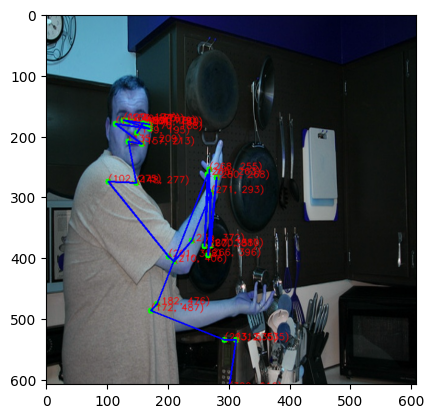

In [43]:
import cv2
import mediapipe as mp

# Load the pose estimation model
mp_pose = mp.solutions.pose

# Read and preprocess the image
image = cv2.imread('000000000294.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform pose estimation
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)
    landmarks = results.pose_landmarks

    # Extract body coordinates and display them
    if landmarks:
        # Create a list to store the coordinates
        coordinates = []

        for i, landmark in enumerate(landmarks.landmark):
            # Get the x, y coordinates of each body part
            height, width, _ = image.shape
            x = int(landmark.x * width)
            y = int(landmark.y * height)

            # Append the coordinates to the list
            coordinates.append((x, y))

            # Display the coordinates on the image
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # Join the coordinates with lines
        for i in range(len(coordinates) - 1):
            x_a, y_a = coordinates[i]
            x_b, y_b = coordinates[i + 1]

            # Draw a line between the two body parts
            cv2.line(image, (x_a, y_a), (x_b, y_b), (0, 0, 255), 2)

plt.imshow(image)           
        # Display the image with coordinates and lines
#         cv2.imshow('Body with Lines', image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()


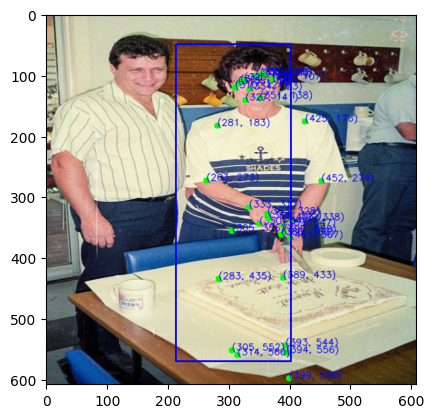

In [11]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Load the pose estimation model
mp_pose = mp.solutions.pose

# Read and preprocess the image
image = cv2.imread('./person_images/000000000113.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform pose estimation
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)
    landmarks = results.pose_landmarks

    # Extract body coordinates and display them
    if landmarks:
        # Create a list to store the coordinates
        coordinates = []

        for i, landmark in enumerate(landmarks.landmark):
            # Get the x, y coordinates of each body part
            height, width, _ = image.shape
            x = int(landmark.x * width)
            y = int(landmark.y * height)

            # Append the coordinates to the list
            coordinates.append((x, y))

            # Display the coordinates on the image
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.putText(image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

        # Calculate the bounding box coordinates
        x_min = min(x for x, _ in coordinates) -50
        x_max = max(x for x, _ in coordinates) -50 
        y_min = min(y for _, y in coordinates) -50
        y_max = max(y for _, y in coordinates) -50

        # Draw a box around the person
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

        # Display the image with coordinates and the box
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()


In [49]:
imgs

['000000020904.jpg',
 '000000003076.jpg',
 '000000041959.jpg',
 '000000023548.jpg',
 '000000011288.jpg',
 '000000023102.jpg',
 '000000018418.jpg',
 '000000019446.jpg',
 '000000037102.jpg',
 '000000010920.jpg',
 '000000022044.jpg',
 '000000021329.jpg',
 '000000013719.jpg',
 '000000043773.jpg',
 '000000040428.jpg',
 '000000020644.jpg',
 '000000010837.jpg',
 '000000039764.jpg',
 '000000009727.jpg',
 '000000022801.jpg',
 '000000020983.jpg',
 '000000042858.jpg',
 '000000035361.jpg',
 '000000006627.jpg',
 '000000023094.jpg',
 '000000011025.jpg',
 '000000031752.jpg',
 '000000027417.jpg',
 '000000020456.jpg',
 '000000015576.jpg',
 '000000030431.jpg',
 '000000049862.jpg',
 '000000035206.jpg',
 '000000017741.jpg',
 '000000013267.jpg',
 '000000042671.jpg',
 '000000021223.jpg',
 '000000000781.jpg',
 '000000017954.jpg',
 '000000047189.jpg',
 '000000030413.jpg',
 '000000021378.jpg',
 '000000038548.jpg',
 '000000021764.jpg',
 '000000044781.jpg',
 '000000000109.jpg',
 '000000036598.jpg',
 '00000000498

In [21]:
import cv2
import mediapipe as mp
import os
import numpy as np
flatten_coords= []
imgs = os.listdir('./person_images')
# Load the pose estimation model
mp_pose = mp.solutions.pose
for temp in imgs:
    # Read and preprocess the image
    path = os.path.join('./person_images',temp)
    print(path)
    image = cv2.imread(path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create an empty list to store the coordinates
    coordinates = []

    # Perform pose estimation
    with mp_pose.Pose(static_image_mode=True) as pose:
        results = pose.process(image_rgb)
        landmarks = results.pose_landmarks

        # Extract body coordinates and display them
        if landmarks:
            for i, landmark in enumerate(landmarks.landmark):
                # Get the x, y coordinates of each body part
                height, width, _ = image.shape
                x = int(landmark.x * width)
                y = int(landmark.y * height)

                # Append the coordinates to the list
                coordinates.append((x, y))

                # Display the coordinates on the image
                cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
                cv2.putText(image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

#     # Display the image with coordinates
#     import matplotlib.pyplot as plt

#     plt.imshow(image)
#     plt.show()

    # Print the list of coordinates
    try:
        x_min = min(x for x, _ in coordinates) -50
        x_max = max(x for x, _ in coordinates) -50 
        y_min = min(y for _, y in coordinates) -50
        y_max = max(y for _, y in coordinates) -50
    except:
        x_min = 0
        x_max = 0
        y_min = 0
        y_max = 0
        
    flatten_coords.append(np.array([x_min,y_min,x_max,y_max]).flatten())

./person_images/000000000036.jpg
./person_images/000000000049.jpg
./person_images/000000000061.jpg
./person_images/000000000074.jpg
./person_images/000000000077.jpg
./person_images/000000000086.jpg
./person_images/000000000109.jpg
./person_images/000000000110.jpg
./person_images/000000000113.jpg
./person_images/000000000136.jpg
./person_images/000000000149.jpg
./person_images/000000000151.jpg
./person_images/000000000165.jpg
./person_images/000000000192.jpg
./person_images/000000000201.jpg
./person_images/000000000241.jpg
./person_images/000000000257.jpg
./person_images/000000001200.jpg
./person_images/000000001204.jpg
./person_images/000000001216.jpg
./person_images/000000001232.jpg
./person_images/000000001237.jpg
./person_images/000000001244.jpg
./person_images/000000001270.jpg
./person_images/000000001271.jpg
./person_images/000000001290.jpg
./person_images/000000001292.jpg
./person_images/000000001295.jpg
./person_images/000000001298.jpg
./person_images/000000001307.jpg
./person_i

./person_images/000000008396.jpg
./person_images/000000008414.jpg
./person_images/000000008422.jpg
./person_images/000000008771.jpg
./person_images/000000008772.jpg
./person_images/000000008781.jpg
./person_images/000000008787.jpg
./person_images/000000008791.jpg
./person_images/000000008794.jpg
./person_images/000000008803.jpg
./person_images/000000008807.jpg
./person_images/000000008809.jpg
./person_images/000000008813.jpg
./person_images/000000008816.jpg
./person_images/000000008832.jpg
./person_images/000000008834.jpg
./person_images/000000008836.jpg
./person_images/000000008841.jpg
./person_images/000000008846.jpg
./person_images/000000008853.jpg
./person_images/000000008856.jpg
./person_images/000000008872.jpg
./person_images/000000008896.jpg
./person_images/000000008909.jpg
./person_images/000000008923.jpg
./person_images/000000008933.jpg
./person_images/000000009651.jpg
./person_images/000000009656.jpg
./person_images/000000009658.jpg
./person_images/000000009669.jpg
./person_i

./person_images/000000017590.jpg
./person_images/000000017591.jpg
./person_images/000000017644.jpg
./person_images/000000017667.jpg
./person_images/000000017683.jpg
./person_images/000000017696.jpg
./person_images/000000017697.jpg
./person_images/000000017703.jpg
./person_images/000000017708.jpg
./person_images/000000017712.jpg
./person_images/000000017741.jpg
./person_images/000000017755.jpg
./person_images/000000017766.jpg
./person_images/000000017776.jpg
./person_images/000000017799.jpg
./person_images/000000018482.jpg
./person_images/000000018501.jpg
./person_images/000000018507.jpg
./person_images/000000018523.jpg
./person_images/000000018529.jpg
./person_images/000000018530.jpg
./person_images/000000018535.jpg
./person_images/000000018542.jpg
./person_images/000000018554.jpg
./person_images/000000018557.jpg
./person_images/000000018559.jpg
./person_images/000000018563.jpg
./person_images/000000018564.jpg
./person_images/000000018584.jpg
./person_images/000000018605.jpg
./person_i

./person_images/000000026164.jpg
./person_images/000000026166.jpg
./person_images/000000026176.jpg
./person_images/000000026185.jpg
./person_images/000000026201.jpg
./person_images/000000026209.jpg
./person_images/000000026233.jpg
./person_images/000000026241.jpg
./person_images/000000026260.jpg
./person_images/000000026263.jpg
./person_images/000000013969.jpg
./person_images/000000014160.jpg
./person_images/000000014392.jpg
./person_images/000000014683.jpg
./person_images/000000014807.jpg
./person_images/000000014990.jpg
./person_images/000000015219.jpg
./person_images/000000015496.jpg
./person_images/000000015658.jpg
./person_images/000000015885.jpg
./person_images/000000016123.jpg
./person_images/000000016290.jpg
./person_images/000000016470.jpg
./person_images/000000016616.jpg
./person_images/000000016902.jpg
./person_images/000000017267.jpg
./person_images/000000017432.jpg
./person_images/000000017578.jpg
./person_images/000000017817.jpg
./person_images/000000018201.jpg
./person_i

./person_images/000000033991.jpg
./person_images/000000034015.jpg
./person_images/000000034020.jpg
./person_images/000000034039.jpg
./person_images/000000034056.jpg
./person_images/000000034074.jpg
./person_images/000000034097.jpg
./person_images/000000034100.jpg
./person_images/000000034113.jpg
./person_images/000000034120.jpg
./person_images/000000034128.jpg
./person_images/000000034138.jpg
./person_images/000000034151.jpg
./person_images/000000034167.jpg
./person_images/000000034180.jpg
./person_images/000000034702.jpg
./person_images/000000034708.jpg
./person_images/000000034752.jpg
./person_images/000000034754.jpg
./person_images/000000034779.jpg
./person_images/000000034785.jpg
./person_images/000000034786.jpg
./person_images/000000034795.jpg
./person_images/000000034798.jpg
./person_images/000000034800.jpg
./person_images/000000034808.jpg
./person_images/000000034810.jpg
./person_images/000000034815.jpg
./person_images/000000034816.jpg
./person_images/000000034818.jpg
./person_i

./person_images/000000044802.jpg
./person_images/000000044813.jpg
./person_images/000000044815.jpg
./person_images/000000044820.jpg
./person_images/000000044823.jpg
./person_images/000000044825.jpg
./person_images/000000044827.jpg
./person_images/000000044831.jpg
./person_images/000000044839.jpg
./person_images/000000044840.jpg
./person_images/000000044856.jpg
./person_images/000000044858.jpg
./person_images/000000044901.jpg
./person_images/000000044946.jpg
./person_images/000000044952.jpg
./person_images/000000044954.jpg
./person_images/000000044959.jpg
./person_images/000000044960.jpg
./person_images/000000044977.jpg
./person_images/000000045004.jpg
./person_images/000000045284.jpg
./person_images/000000045292.jpg
./person_images/000000045299.jpg
./person_images/000000045306.jpg
./person_images/000000045337.jpg
./person_images/000000045339.jpg
./person_images/000000045343.jpg
./person_images/000000045351.jpg
./person_images/000000045359.jpg
./person_images/000000045374.jpg
./person_i

./person_images/000000011544.jpg
./person_images/000000011567.jpg
./person_images/000000011569.jpg
./person_images/000000011570.jpg
./person_images/000000011576.jpg
./person_images/000000011579.jpg
./person_images/000000011591.jpg
./person_images/000000011613.jpg
./person_images/000000013198.jpg
./person_images/000000013202.jpg
./person_images/000000013220.jpg
./person_images/000000013230.jpg
./person_images/000000013232.jpg
./person_images/000000013249.jpg
./person_images/000000013258.jpg
./person_images/000000013267.jpg
./person_images/000000013274.jpg
./person_images/000000013278.jpg
./person_images/000000013283.jpg
./person_images/000000013285.jpg
./person_images/000000013290.jpg
./person_images/000000013292.jpg
./person_images/000000013296.jpg
./person_images/000000013302.jpg
./person_images/000000013318.jpg
./person_images/000000013325.jpg
./person_images/000000013332.jpg
./person_images/000000013355.jpg
./person_images/000000013357.jpg
./person_images/000000013362.jpg
./person_i

./person_images/000000032626.jpg
./person_images/000000032627.jpg
./person_images/000000032645.jpg
./person_images/000000032664.jpg
./person_images/000000032668.jpg
./person_images/000000032673.jpg
./person_images/000000032674.jpg
./person_images/000000032675.jpg
./person_images/000000032678.jpg
./person_images/000000032679.jpg
./person_images/000000032689.jpg
./person_images/000000032700.jpg
./person_images/000000032707.jpg
./person_images/000000032708.jpg
./person_images/000000034212.jpg
./person_images/000000034214.jpg
./person_images/000000034221.jpg
./person_images/000000034222.jpg
./person_images/000000034223.jpg
./person_images/000000034234.jpg
./person_images/000000034246.jpg
./person_images/000000034267.jpg
./person_images/000000034283.jpg
./person_images/000000034285.jpg
./person_images/000000034299.jpg
./person_images/000000034333.jpg
./person_images/000000034340.jpg
./person_images/000000034354.jpg
./person_images/000000034356.jpg
./person_images/000000034372.jpg
./person_i

./person_images/000000045885.jpg
./person_images/000000045920.jpg
./person_images/000000045922.jpg
./person_images/000000045923.jpg
./person_images/000000045926.jpg
./person_images/000000045942.jpg
./person_images/000000045946.jpg
./person_images/000000045949.jpg
./person_images/000000045954.jpg
./person_images/000000045976.jpg
./person_images/000000045989.jpg
./person_images/000000045994.jpg
./person_images/000000046003.jpg
./person_images/000000046013.jpg
./person_images/000000049048.jpg
./person_images/000000049053.jpg
./person_images/000000049065.jpg
./person_images/000000049068.jpg
./person_images/000000049069.jpg
./person_images/000000049079.jpg
./person_images/000000049080.jpg
./person_images/000000049092.jpg
./person_images/000000049095.jpg
./person_images/000000049096.jpg
./person_images/000000049097.jpg
./person_images/000000049120.jpg
./person_images/000000049123.jpg
./person_images/000000049128.jpg
./person_images/000000049135.jpg
./person_images/000000049143.jpg
./person_i

./person_images/000000007256.jpg
./person_images/000000007260.jpg
./person_images/000000008432.jpg
./person_images/000000008436.jpg
./person_images/000000008443.jpg
./person_images/000000008445.jpg
./person_images/000000008458.jpg
./person_images/000000008468.jpg
./person_images/000000008483.jpg
./person_images/000000008493.jpg
./person_images/000000008494.jpg
./person_images/000000008495.jpg
./person_images/000000008504.jpg
./person_images/000000008519.jpg
./person_images/000000008520.jpg
./person_images/000000008536.jpg
./person_images/000000008553.jpg
./person_images/000000008564.jpg
./person_images/000000009846.jpg
./person_images/000000009859.jpg
./person_images/000000009872.jpg
./person_images/000000009878.jpg
./person_images/000000009885.jpg
./person_images/000000009895.jpg
./person_images/000000009910.jpg
./person_images/000000009927.jpg
./person_images/000000009929.jpg
./person_images/000000009935.jpg
./person_images/000000009941.jpg
./person_images/000000009946.jpg
./person_i

./person_images/000000021365.jpg
./person_images/000000021378.jpg
./person_images/000000021383.jpg
./person_images/000000021394.jpg
./person_images/000000021400.jpg
./person_images/000000021404.jpg
./person_images/000000021417.jpg
./person_images/000000021419.jpg
./person_images/000000021423.jpg
./person_images/000000021459.jpg
./person_images/000000021462.jpg
./person_images/000000021469.jpg
./person_images/000000021470.jpg
./person_images/000000021498.jpg
./person_images/000000021504.jpg
./person_images/000000021528.jpg
./person_images/000000021779.jpg
./person_images/000000021780.jpg
./person_images/000000021786.jpg
./person_images/000000021826.jpg
./person_images/000000021830.jpg
./person_images/000000021846.jpg
./person_images/000000021864.jpg
./person_images/000000021883.jpg
./person_images/000000021889.jpg
./person_images/000000021895.jpg
./person_images/000000021900.jpg
./person_images/000000021905.jpg
./person_images/000000021919.jpg
./person_images/000000021924.jpg
./person_i

./person_images/000000031612.jpg
./person_images/000000031616.jpg
./person_images/000000031621.jpg
./person_images/000000031641.jpg
./person_images/000000031642.jpg
./person_images/000000031650.jpg
./person_images/000000031666.jpg
./person_images/000000031667.jpg
./person_images/000000031699.jpg
./person_images/000000031717.jpg
./person_images/000000031729.jpg
./person_images/000000031734.jpg
./person_images/000000031738.jpg
./person_images/000000031748.jpg
./person_images/000000031752.jpg
./person_images/000000031765.jpg
./person_images/000000031777.jpg
./person_images/000000031788.jpg
./person_images/000000031794.jpg
./person_images/000000032715.jpg
./person_images/000000032720.jpg
./person_images/000000032722.jpg
./person_images/000000032738.jpg
./person_images/000000032739.jpg
./person_images/000000032760.jpg
./person_images/000000032767.jpg
./person_images/000000032773.jpg
./person_images/000000032777.jpg
./person_images/000000032778.jpg
./person_images/000000032801.jpg
./person_i

./person_images/000000044612.jpg
./person_images/000000044621.jpg
./person_images/000000044625.jpg
./person_images/000000044627.jpg
./person_images/000000041649.jpg
./person_images/000000041796.jpg
./person_images/000000041997.jpg
./person_images/000000042166.jpg
./person_images/000000042336.jpg
./person_images/000000042482.jpg
./person_images/000000042671.jpg
./person_images/000000042799.jpg
./person_images/000000042947.jpg
./person_images/000000043163.jpg
./person_images/000000043500.jpg
./person_images/000000043692.jpg
./person_images/000000043895.jpg
./person_images/000000044140.jpg
./person_images/000000044471.jpg
./person_images/000000044637.jpg
./person_images/000000044781.jpg
./person_images/000000046038.jpg
./person_images/000000046042.jpg
./person_images/000000046056.jpg
./person_images/000000046077.jpg
./person_images/000000046099.jpg
./person_images/000000046101.jpg
./person_images/000000046106.jpg
./person_images/000000046146.jpg
./person_images/000000046149.jpg
./person_i

./person_images/000000006417.jpg
./person_images/000000006421.jpg
./person_images/000000006424.jpg
./person_images/000000006432.jpg
./person_images/000000006465.jpg
./person_images/000000006484.jpg
./person_images/000000006489.jpg
./person_images/000000006491.jpg
./person_images/000000006517.jpg
./person_images/000000006531.jpg
./person_images/000000006539.jpg
./person_images/000000006541.jpg
./person_images/000000007894.jpg
./person_images/000000007899.jpg
./person_images/000000007913.jpg
./person_images/000000007921.jpg
./person_images/000000007932.jpg
./person_images/000000007938.jpg
./person_images/000000007946.jpg
./person_images/000000007953.jpg
./person_images/000000007988.jpg
./person_images/000000007989.jpg
./person_images/000000007996.jpg
./person_images/000000008010.jpg
./person_images/000000008014.jpg
./person_images/000000008019.jpg
./person_images/000000008024.jpg
./person_images/000000008025.jpg
./person_images/000000008042.jpg
./person_images/000000008053.jpg
./person_i

./person_images/000000017420.jpg
./person_images/000000017425.jpg
./person_images/000000017839.jpg
./person_images/000000017869.jpg
./person_images/000000017877.jpg
./person_images/000000017882.jpg
./person_images/000000017914.jpg
./person_images/000000017927.jpg
./person_images/000000017935.jpg
./person_images/000000017938.jpg
./person_images/000000017944.jpg
./person_images/000000017945.jpg
./person_images/000000017954.jpg
./person_images/000000017962.jpg
./person_images/000000017967.jpg
./person_images/000000017972.jpg
./person_images/000000017975.jpg
./person_images/000000017985.jpg
./person_images/000000018020.jpg
./person_images/000000018041.jpg
./person_images/000000018048.jpg
./person_images/000000018059.jpg
./person_images/000000018073.jpg
./person_images/000000018075.jpg
./person_images/000000018090.jpg
./person_images/000000018093.jpg
./person_images/000000018099.jpg
./person_images/000000018111.jpg
./person_images/000000018127.jpg
./person_images/000000018136.jpg
./person_i

./person_images/000000031061.jpg
./person_images/000000031073.jpg
./person_images/000000031078.jpg
./person_images/000000031080.jpg
./person_images/000000031081.jpg
./person_images/000000031082.jpg
./person_images/000000031084.jpg
./person_images/000000031092.jpg
./person_images/000000031106.jpg
./person_images/000000031112.jpg
./person_images/000000031113.jpg
./person_images/000000031121.jpg
./person_images/000000031151.jpg
./person_images/000000031157.jpg
./person_images/000000031161.jpg
./person_images/000000031164.jpg
./person_images/000000031187.jpg
./person_images/000000031188.jpg
./person_images/000000031825.jpg
./person_images/000000031851.jpg
./person_images/000000031882.jpg
./person_images/000000031888.jpg
./person_images/000000031902.jpg
./person_images/000000031904.jpg
./person_images/000000031913.jpg
./person_images/000000031915.jpg
./person_images/000000031919.jpg
./person_images/000000031922.jpg
./person_images/000000031923.jpg
./person_images/000000031941.jpg
./person_i

./person_images/000000046372.jpg
./person_images/000000046385.jpg
./person_images/000000046419.jpg
./person_images/000000046429.jpg
./person_images/000000046433.jpg
./person_images/000000046440.jpg
./person_images/000000046441.jpg
./person_images/000000046447.jpg
./person_images/000000046454.jpg
./person_images/000000046460.jpg
./person_images/000000046473.jpg
./person_images/000000047020.jpg
./person_images/000000047054.jpg
./person_images/000000047073.jpg
./person_images/000000047074.jpg
./person_images/000000047084.jpg
./person_images/000000047093.jpg
./person_images/000000047101.jpg
./person_images/000000047125.jpg
./person_images/000000047131.jpg
./person_images/000000047164.jpg
./person_images/000000047173.jpg
./person_images/000000047177.jpg
./person_images/000000047181.jpg
./person_images/000000047189.jpg
./person_images/000000047191.jpg
./person_images/000000047194.jpg
./person_images/000000047203.jpg
./person_images/000000047213.jpg
./person_images/000000047221.jpg
./person_i

./person_images/000000013132.jpg
./person_images/000000013143.jpg
./person_images/000000013148.jpg
./person_images/000000013168.jpg
./person_images/000000013172.jpg
./person_images/000000013175.jpg
./person_images/000000013176.jpg
./person_images/000000013182.jpg
./person_images/000000014818.jpg
./person_images/000000014824.jpg
./person_images/000000014835.jpg
./person_images/000000014844.jpg
./person_images/000000014849.jpg
./person_images/000000014864.jpg
./person_images/000000014870.jpg
./person_images/000000014873.jpg
./person_images/000000014874.jpg
./person_images/000000014876.jpg
./person_images/000000014886.jpg
./person_images/000000014892.jpg
./person_images/000000014925.jpg
./person_images/000000014928.jpg
./person_images/000000014938.jpg
./person_images/000000014961.jpg
./person_images/000000014966.jpg
./person_images/000000014969.jpg
./person_images/000000014970.jpg
./person_images/000000014975.jpg
./person_images/000000014985.jpg
./person_images/000000014986.jpg
./person_i

./person_images/000000027208.jpg
./person_images/000000027221.jpg
./person_images/000000027224.jpg
./person_images/000000030395.jpg
./person_images/000000030712.jpg
./person_images/000000030960.jpg
./person_images/000000031202.jpg
./person_images/000000031390.jpg
./person_images/000000031582.jpg
./person_images/000000031822.jpg
./person_images/000000032116.jpg
./person_images/000000032339.jpg
./person_images/000000032524.jpg
./person_images/000000032712.jpg
./person_images/000000032967.jpg
./person_images/000000033186.jpg
./person_images/000000033435.jpg
./person_images/000000033612.jpg
./person_images/000000033718.jpg
./person_images/000000033838.jpg
./person_images/000000034207.jpg
./person_images/000000034437.jpg
./person_images/000000030034.jpg
./person_images/000000030038.jpg
./person_images/000000030044.jpg
./person_images/000000030049.jpg
./person_images/000000030055.jpg
./person_images/000000030062.jpg
./person_images/000000030066.jpg
./person_images/000000030067.jpg
./person_i

./person_images/000000040723.jpg
./person_images/000000040729.jpg
./person_images/000000040732.jpg
./person_images/000000040737.jpg
./person_images/000000040768.jpg
./person_images/000000040771.jpg
./person_images/000000041658.jpg
./person_images/000000041666.jpg
./person_images/000000041669.jpg
./person_images/000000041673.jpg
./person_images/000000041687.jpg
./person_images/000000041700.jpg
./person_images/000000041708.jpg
./person_images/000000041710.jpg
./person_images/000000041711.jpg
./person_images/000000041729.jpg
./person_images/000000041739.jpg
./person_images/000000041740.jpg
./person_images/000000041742.jpg
./person_images/000000041745.jpg
./person_images/000000041753.jpg
./person_images/000000041756.jpg
./person_images/000000041763.jpg
./person_images/000000041770.jpg
./person_images/000000041771.jpg
./person_images/000000042339.jpg
./person_images/000000042342.jpg
./person_images/000000042347.jpg
./person_images/000000042349.jpg
./person_images/000000042371.jpg
./person_i

./person_images/000000049309.jpg
./person_images/000000049312.jpg
./person_images/000000049321.jpg
./person_images/000000049327.jpg
./person_images/000000049338.jpg
./person_images/000000049862.jpg
./person_images/000000049866.jpg
./person_images/000000049881.jpg
./person_images/000000049884.jpg
./person_images/000000049886.jpg
./person_images/000000049891.jpg
./person_images/000000049893.jpg
./person_images/000000049901.jpg
./person_images/000000049902.jpg
./person_images/000000049904.jpg
./person_images/000000049913.jpg
./person_images/000000049933.jpg
./person_images/000000049952.jpg
./person_images/000000049977.jpg
./person_images/000000049979.jpg
./person_images/000000049985.jpg
./person_images/000000049988.jpg
./person_images/000000010693.jpg
./person_images/000000010698.jpg
./person_images/000000010701.jpg
./person_images/000000010705.jpg
./person_images/000000010710.jpg
./person_images/000000010711.jpg
./person_images/000000010727.jpg
./person_images/000000010743.jpg
./person_i

In [12]:
import numpy as np

In [16]:
temp = np.array(coordinates)
fl = temp.flatten()

In [17]:
fl

array([149, 195, 159, 179, 164, 180, 170, 181, 140, 176, 133, 175, 127,
       174, 170, 188, 114, 180, 157, 213, 135, 209, 148, 277, 102, 275,
       201, 398, 210, 406, 239, 372, 271, 293, 266, 396, 280, 268, 270,
       380, 268, 255, 260, 381, 265, 263, 182, 476, 172, 487, 293, 535,
       312, 535, 300, 616, 360, 646, 290, 633, 347, 670, 351, 632, 437,
       662])

In [19]:
coord_list

[[(149, 195),
  (159, 179),
  (164, 180),
  (170, 181),
  (140, 176),
  (133, 175),
  (127, 174),
  (170, 188),
  (114, 180),
  (157, 213),
  (135, 209),
  (148, 277),
  (102, 275),
  (201, 398),
  (210, 406),
  (239, 372),
  (271, 293),
  (266, 396),
  (280, 268),
  (270, 380),
  (268, 255),
  (260, 381),
  (265, 263),
  (182, 476),
  (172, 487),
  (293, 535),
  (312, 535),
  (300, 616),
  (360, 646),
  (290, 633),
  (347, 670),
  (351, 632),
  (437, 662)],
 [(149, 195),
  (159, 179),
  (164, 180),
  (170, 181),
  (140, 176),
  (133, 175),
  (127, 174),
  (170, 188),
  (114, 180),
  (157, 213),
  (135, 209),
  (148, 277),
  (102, 275),
  (201, 398),
  (210, 406),
  (239, 372),
  (271, 293),
  (266, 396),
  (280, 268),
  (270, 380),
  (268, 255),
  (260, 381),
  (265, 263),
  (182, 476),
  (172, 487),
  (293, 535),
  (312, 535),
  (300, 616),
  (360, 646),
  (290, 633),
  (347, 670),
  (351, 632),
  (437, 662)],
 [(149, 195),
  (159, 179),
  (164, 180),
  (170, 181),
  (140, 176),
  (1

In [20]:
imgs = os.listdir('./person_images')

In [22]:
import pandas as pd
data = pd.DataFrame()
data['Name']=imgs

In [30]:
data['COORD'] = coord_list

# Specify the file path and name
file_path = './DataFrame/file.csv'

# Save the DataFrame as a CSV file
data.to_csv(file_path, index=False)


In [32]:
flatten_list = []
for o in coord_list:
    flatten_list.append(np.array(o).flatten())

In [25]:
list(flatten_coords)

[array([228, 157, 532, 971]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([ -3, 243,  79, 487]),
 array([143, 123, 284, 459]),
 array([0, 0, 0, 0]),
 array([117,  13, 521, 816]),
 array([213,  49, 402, 570]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([200, 137, 253, 351]),
 array([-14,  49, 236, 781]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([139,   3, 334, 552]),
 array([ 93, 407, 149, 566]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([ 30,  65,  72, 299]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([  2, 162, 106, 445]),
 array([ 75,  76, 208, 449]),
 array([0, 0, 0, 0]),
 array([107,  77, 340, 740]),
 array([0, 0, 0, 0]),
 array([ 96,  16, 434, 530]),
 array([0, 0, 0, 0]),
 array([149, 148, 289, 330]),
 array([0, 0, 0, 0]),
 array([124, 133, 379, 499]),
 array([0, 0, 0, 0]),
 array([ 30, 194, 317, 494]),
 array([0, 0, 0, 0]),
 array([508, 413, 520, 540]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0])

In [26]:
import pandas as pd
data = pd.DataFrame()
data['Name'] = imgs
data['COORDS'] = list(flatten_coords)

In [27]:
data

,Name,COORDS
0,000000000036.jpg,"[228, 157, 532, 971]"
1,000000000049.jpg,"[0, 0, 0, 0]"
2,000000000061.jpg,"[0, 0, 0, 0]"
3,000000000074.jpg,"[0, 0, 0, 0]"
4,000000000077.jpg,"[-3, 243, 79, 487]"
...,...,...
5175,000000048044.jpg,"[228, 111, 446, 551]"
5176,000000048047.jpg,"[0, 0, 0, 0]"
5177,000000048066.jpg,"[0, 0, 0, 0]"
5178,000000048067.jpg,"[0, 0, 0, 0]"


In [28]:
file_path = './DataFrame/boxCoords.csv'

# Save the DataFrame as a CSV file
data.to_csv(file_path, index=False)

In [29]:
import pickle
pickle.dump(flatten_coords,open('./boxCoord.pkl','wb'))

In [62]:
data

,Name,COORDS
0,000000020904.jpg,[]
1,000000003076.jpg,[]
2,000000041959.jpg,[]
3,000000023548.jpg,"[334, 101, 340, 87, 345, 85, 350, 84, 330, 88,..."
4,000000011288.jpg,"[274, 376, 274, 373, 273, 373, 272, 373, 276, ..."
...,...,...
5175,000000049460.jpg,[]
5176,000000047940.jpg,[]
5177,000000027511.jpg,[]
5178,000000047832.jpg,"[260, 186, 257, 168, 261, 167, 264, 165, 246, ..."


In [64]:
type(data['COORDS'][3])

numpy.ndarray

In [65]:
Max = 0 
for i in flatten_coords:
    a = len(i)
    if a > Max:
        Max = a

Max

66

In [1]:
from PIL import Image

def convert_to_black_and_white(image_path, output_path):
    # Open the image file
    image = Image.open(image_path)
    
    # Convert the image to black and white
    black_and_white = image.convert("L")
    
    # Save the black and white image
    black_and_white.save(output_path)
    
    print("Image converted and saved successfully!")

# Specify the input and output paths
input_path = "./person_images/000000000036.jpg"
output_path = "./BLACK_AND_WHITE/temp.jpg"

# Call the function to convert and save the image
convert_to_black_and_white(input_path, output_path)


Image converted and saved successfully!


In [6]:
import os
imgs = os.listdir('./person_images')

In [9]:
for i in imgs:
    input_path = os.path.join('./person_images',i)
    output_path = os.path.join('./BLACK_AND_WHITE',i)
    convert_to_black_and_white(input_path, output_path)

Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!


Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
Image converted and saved successfully!
